<div><h2><b><center>MANOJ KUMAR - 2048015</b></h2></div>
<div><h3><b><center>Lab 5 & 6 - Chronic Kidney Disease</b></h3></div>

**Create a program to implement ANN, SVM and Logistic regression for binary classification using respective datasets related to your own doamin. Find out the inference related to following:**

1. Time complexity
2. Generalizing capacity of each technique
3. Hyper parameter tuning and 
4. Advantages and disadvantages of each technique


NOTE: Prepare a detailed report (Word document) on comparative study.

###### Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

###### Reading the dataset

In [2]:
ckd_df = pd.read_csv('kidney_disease.csv')

#Check the shape
print(ckd_df.shape)

(400, 26)


In [3]:
#check the columns
ckd_df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

###### Rename the columns to have meaningful names

In [4]:
col_dict={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"hemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

ckd_df.rename(columns=col_dict, inplace=True)

#Check the column names again
ckd_df.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'classification'],
      dtype='object')

###### Observing the data

In [5]:
ckd_df.head(11).T

,0,1,2,3,4,5,6,7,8,9,10
id,0,1,2,3,4,5,6,7,8,9,10
age,48,7,62,48,51,60,68,24,52,53,50
blood_pressure,80,50,80,70,80,90,70,NaN,100,90,60
specific_gravity,1.02,1.02,1.01,1.005,1.01,1.015,1.01,1.015,1.015,1.02,1.01
albumin,1,4,2,4,2,3,0,2,3,2,2
sugar,0,0,3,0,0,0,0,4,0,0,4
red_blood_cells,NaN,NaN,normal,normal,normal,NaN,NaN,normal,normal,abnormal,NaN
pus_cell,normal,normal,normal,abnormal,normal,NaN,normal,abnormal,abnormal,abnormal,abnormal
pus_cell_clumps,notpresent,notpresent,notpresent,present,notpresent,notpresent,notpresent,notpresent,present,present,present
bacteria,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent


##### Data DeepDive

In [6]:
for i in ckd_df.drop("id",axis=1).columns:
    print('unique values in "{}":\n'.format(i),ckd_df[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "blood_pressure":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "specific_gravity":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "albumin":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "sugar":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "red_blood_cells":
 [nan 'normal' 'abnormal']
unique values in "pus_cell":
 ['normal' 'abnormal' nan]
unique values in "pus_cell_clumps":
 ['notpresent' 'present' nan]
unique values in "bacteria":
 ['notpresent' 'present' nan]
unique values in "blood_glucose_random":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114

In [7]:
#Replace incorrect values
ckd_df['diabetes_mellitus'] =ckd_df['diabetes_mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
ckd_df['coronary_artery_disease'] = ckd_df['coronary_artery_disease'].replace(to_replace='\tno',value='no')
ckd_df['white_blood_cell_count'] = ckd_df['white_blood_cell_count'].replace(to_replace='\t8400',value='8400')
ckd_df["classification"]=ckd_df["classification"].replace("ckd\t", "ckd")

for i in range(ckd_df.shape[0]):
    if ckd_df.iloc[i,16]=='\t?':
        ckd_df.iloc[i,16]=np.nan
    if ckd_df.iloc[i,16]=='\t43':
        ckd_df.iloc[i,16]='43'
    if ckd_df.iloc[i,17]=='\t?':
        ckd_df.iloc[i,17]=np.nan
    if ckd_df.iloc[i,17]=='\t6200':
        ckd_df.iloc[i,17]= '6200'
    if ckd_df.iloc[i,18]=='\t?':
        ckd_df.iloc[i,18]=np.nan
    if ckd_df.iloc[i,25]=='ckd':
        ckd_df.iloc[i,25]='1'
    if ckd_df.iloc[i,25]=='notckd':
        ckd_df.iloc[i,25]='0'

for i in ckd_df.drop("id",axis=1).columns:
    print('unique values in "{}":\n'.format(i),ckd_df[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "blood_pressure":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "specific_gravity":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "albumin":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "sugar":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "red_blood_cells":
 [nan 'normal' 'abnormal']
unique values in "pus_cell":
 ['normal' 'abnormal' nan]
unique values in "pus_cell_clumps":
 ['notpresent' 'present' nan]
unique values in "bacteria":
 ['notpresent' 'present' nan]
unique values in "blood_glucose_random":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114

In [8]:
# Observing the summarized information of data
ckd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [9]:
ckd_df.iloc[:,-1]=ckd_df.iloc[:,-1].astype('int64')
ckd_df.head(11).T

,0,1,2,3,4,5,6,7,8,9,10
id,0,1,2,3,4,5,6,7,8,9,10
age,48,7,62,48,51,60,68,24,52,53,50
blood_pressure,80,50,80,70,80,90,70,NaN,100,90,60
specific_gravity,1.02,1.02,1.01,1.005,1.01,1.015,1.01,1.015,1.015,1.02,1.01
albumin,1,4,2,4,2,3,0,2,3,2,2
sugar,0,0,3,0,0,0,0,4,0,0,4
red_blood_cells,NaN,NaN,normal,normal,normal,NaN,NaN,normal,normal,abnormal,NaN
pus_cell,normal,normal,normal,abnormal,normal,NaN,normal,abnormal,abnormal,abnormal,abnormal
pus_cell_clumps,notpresent,notpresent,notpresent,present,notpresent,notpresent,notpresent,notpresent,present,present,present
bacteria,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent


In [10]:
print(ckd_df['packed_cell_volume'].unique())
print(ckd_df['white_blood_cell_count'].unique())
print(ckd_df['red_blood_cell_count'].unique())

['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '52' '14' '22' '18' '42' '17' '46' '23' '19'
 '25' '41' '26' '15' '21' '43' '20' '47' '9' '49' '50' '53' '51' '54']
['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '7100' '11800' '9400' '5500' '5800' '13200'
 '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800' '6500'
 '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300' '12400'
 '10500' '4200' '4700' '10900' '8100' '9500' '2200' '12800' '11200'
 '19100' '12300' '16700' '2600' '26400' '8800' '7400' '4900' '8000'
 '12000' '15700' '4100' '5700' '11500' '5400' '10800' '9900' '5200' '5900'
 '9300' '9700' '5100' '6600']
['5.2' nan '3.9' '4.6' '4.4' '5' '4.0' '3.7' '3.8' '3.4' '2.6' '2.8' '4.3'
 '3.2' '3.6' '4' '4.1' '4.9' '2.5' '

In [11]:
mistyped=['packed_cell_volume','white_blood_cell_count','red_blood_cell_count']
for col in mistyped:
        ckd_df[col]=ckd_df[col].astype('float')
                
numeric=[]
for i in ckd_df.columns:
    if ckd_df[i].dtype=='float64':
        numeric.append(i)

numeric 

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'hemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [12]:
ckd_df.drop('id',axis=1,inplace=True)

categoricals=[]

for col in ckd_df.columns:
    if not col in numeric:
        categoricals.append(col)
categoricals.remove('classification')

categoricals

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema',
 'anemia']

In [13]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.style as style
style.use('fivethirtyeight')

##### Checking distribution of the numerical features

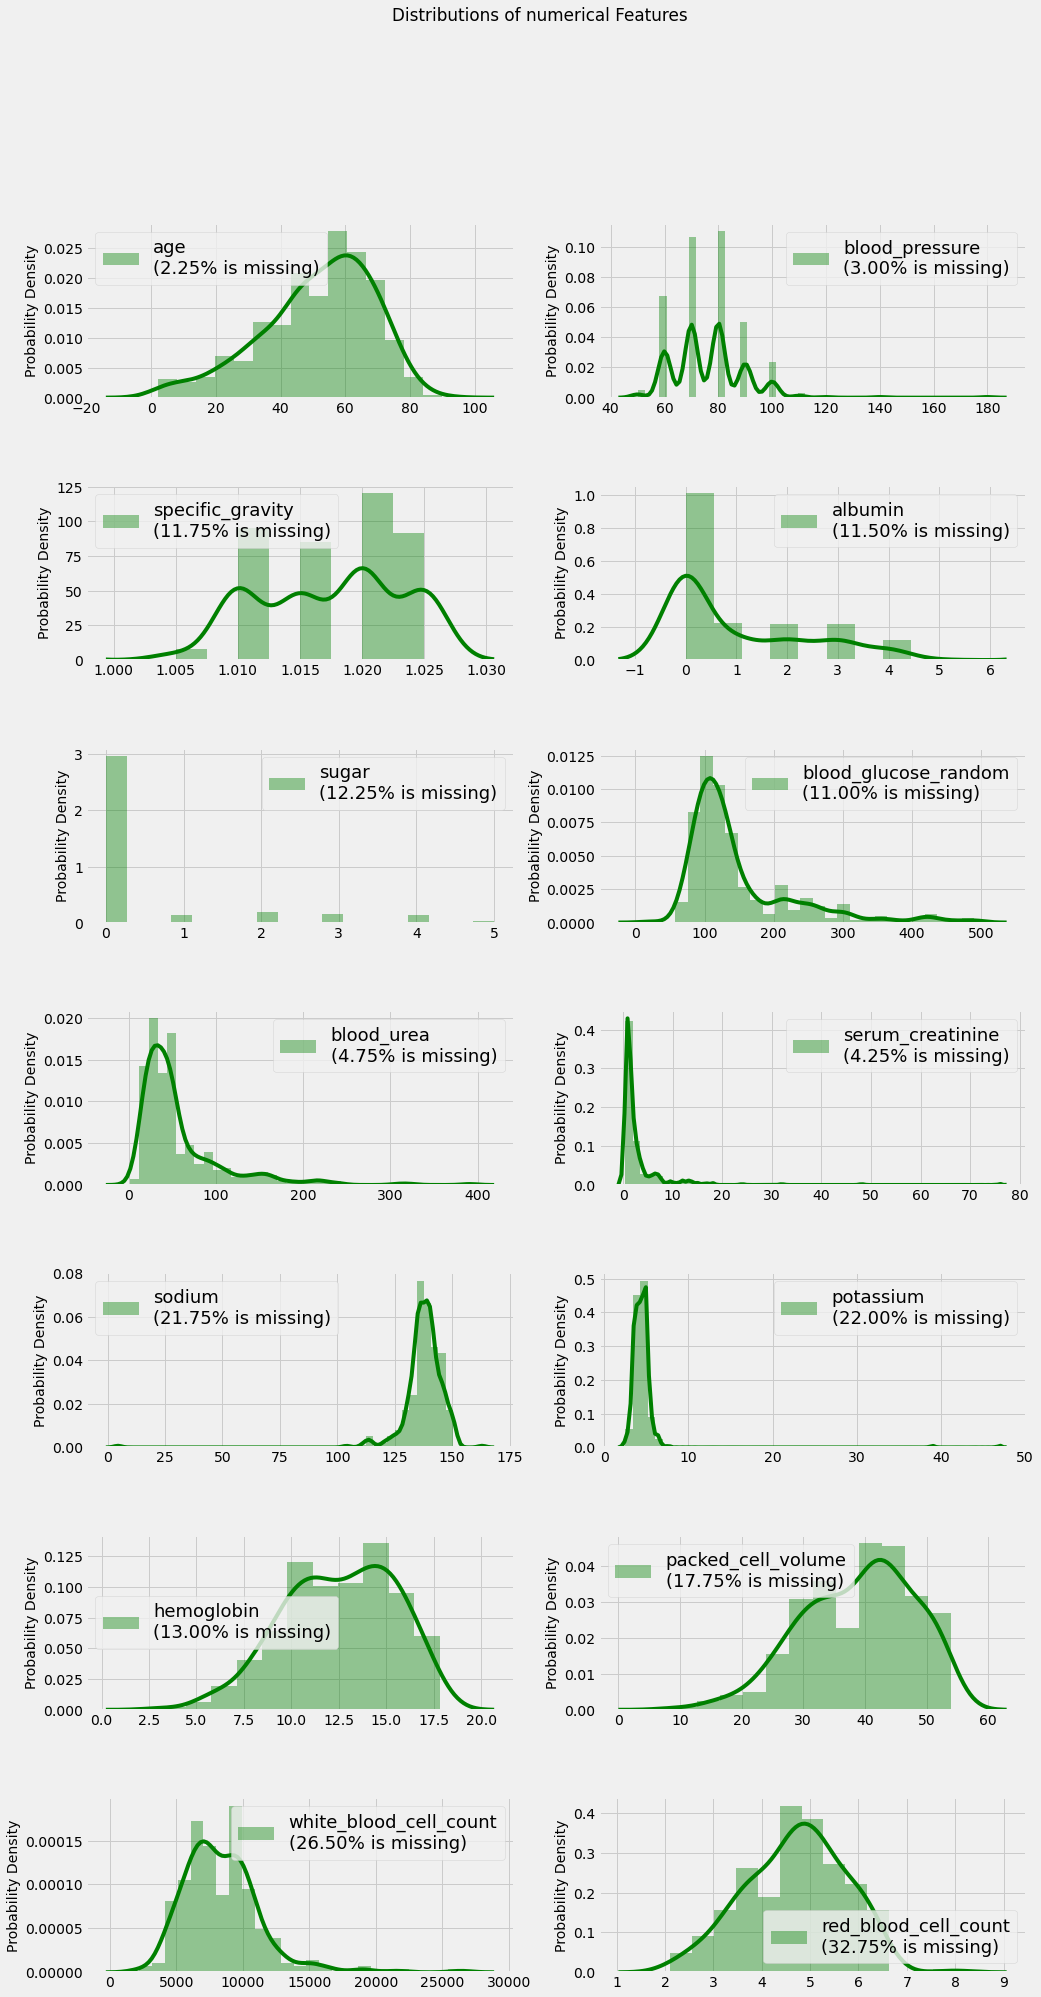

In [14]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15,30))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of numerical Features')

n_rows, n_cols = (7,2)

for index, column in enumerate(numeric):
    
    i,j = (index // n_cols), (index % n_cols)
    miss_perc="%.2f"%(100*(1-(ckd_df[column].dropna().shape[0])/ckd_df.shape[0]))
    collabel=column+"\n({}% is missing)".format(miss_perc)
    fig=sns.distplot(ckd_df[column], color="green", label=collabel, 
                     norm_hist=True, ax=axes[i,j], kde_kws={"lw":4})
    fig=fig.legend(loc='best', fontsize=18)
    
    axes[i,j].set_ylabel("Probability Density",fontsize='medium')
    axes[i,j].set_xlabel(None)

plt.show()

##### Checking distribution of the Categorical features

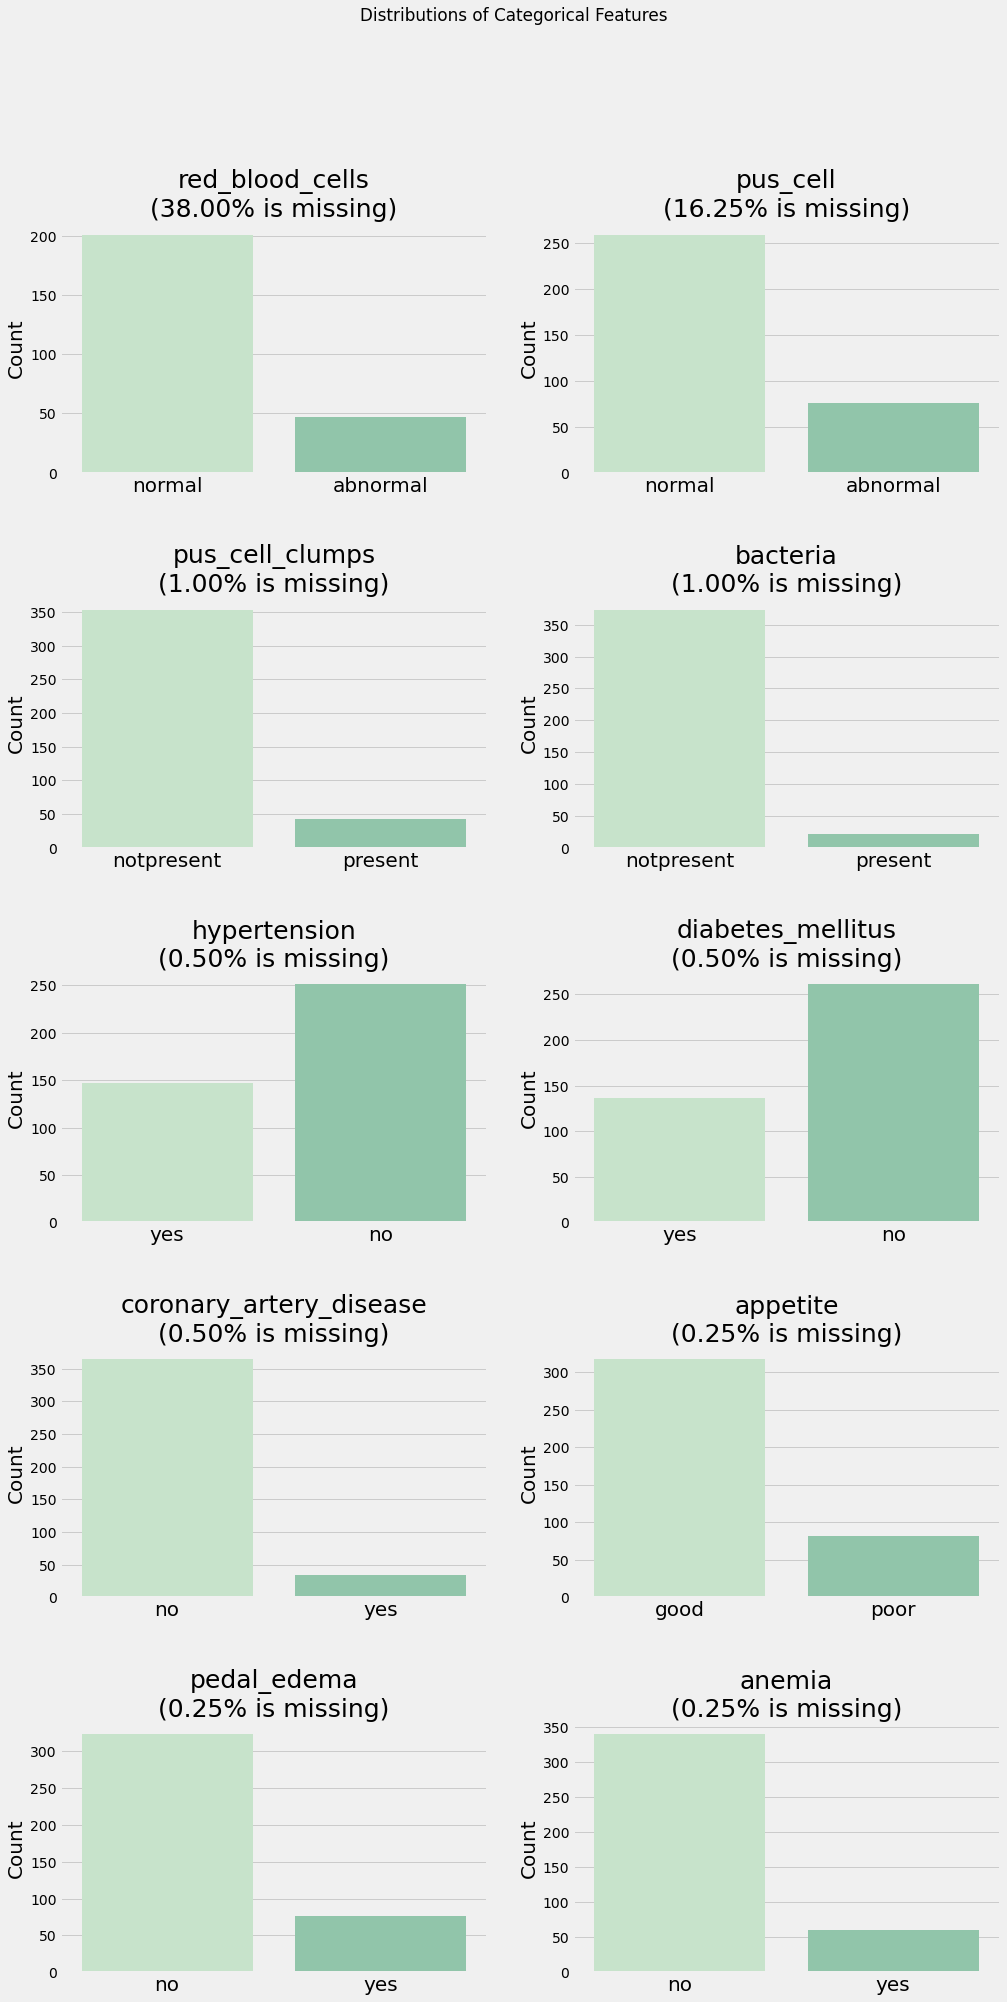

In [15]:
style.use('fivethirtyeight')

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,30))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of Categorical Features')

n_rows, n_cols = (5,2)

for index, column in enumerate(categoricals):
    
    i,j = index // n_cols, index % n_cols
    miss_perc="%.2f"%(100*(1-(ckd_df[column].dropna().shape[0])/ckd_df.shape[0]))
    collabel=column+"\n({}% is missing)".format(miss_perc)
    fig = sns.countplot(x=column, data=ckd_df,label=collabel, 
                        palette=sns.cubehelix_palette(rot=-.4,light=0.85,hue=1), ax=axes[i,j])
    
    axes[i,j].set_title(collabel,fontsize=25)
    axes[i,j].set_xlabel(None)
    axes[i,j].set_ylabel("Count",fontsize=20)
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), Fontsize=20)

plt.show()

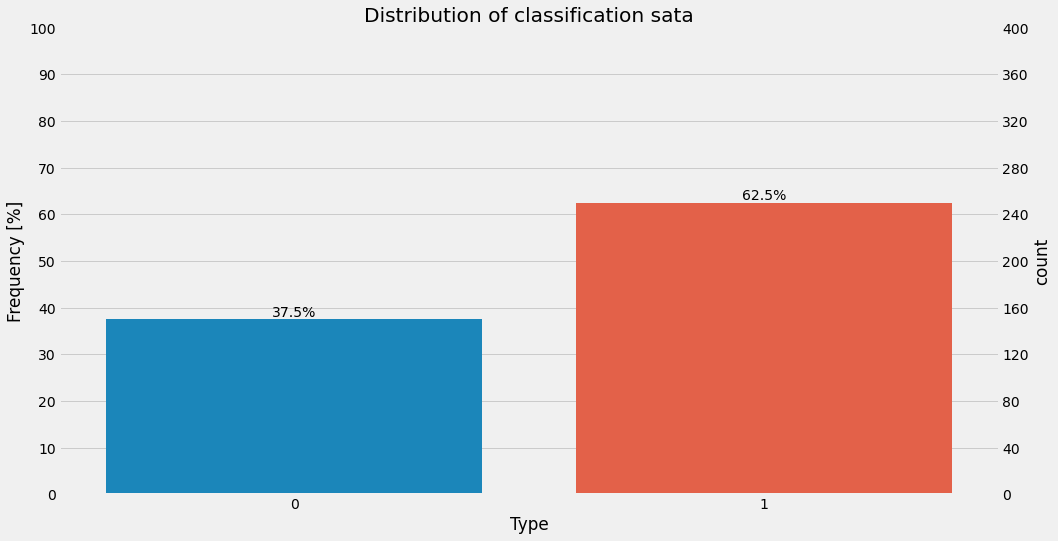

In [16]:
import matplotlib.ticker as ticker
style.use('fivethirtyeight')
# Some random data
ncount = 400

plt.figure(figsize=(15,8))
ax = sns.countplot(x="classification", data=ckd_df)
plt.title('Distribution of classification sata')
plt.xlabel('Type')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

In [17]:
for i in range(ckd_df.shape[0]):
    if ckd_df.iloc[i,24]=='ckd':
        ckd_df.iloc[i,24]='1'
    if ckd_df.iloc[i,24]=='notckd':
        ckd_df.iloc[i,24]='0'

##### Missing Values

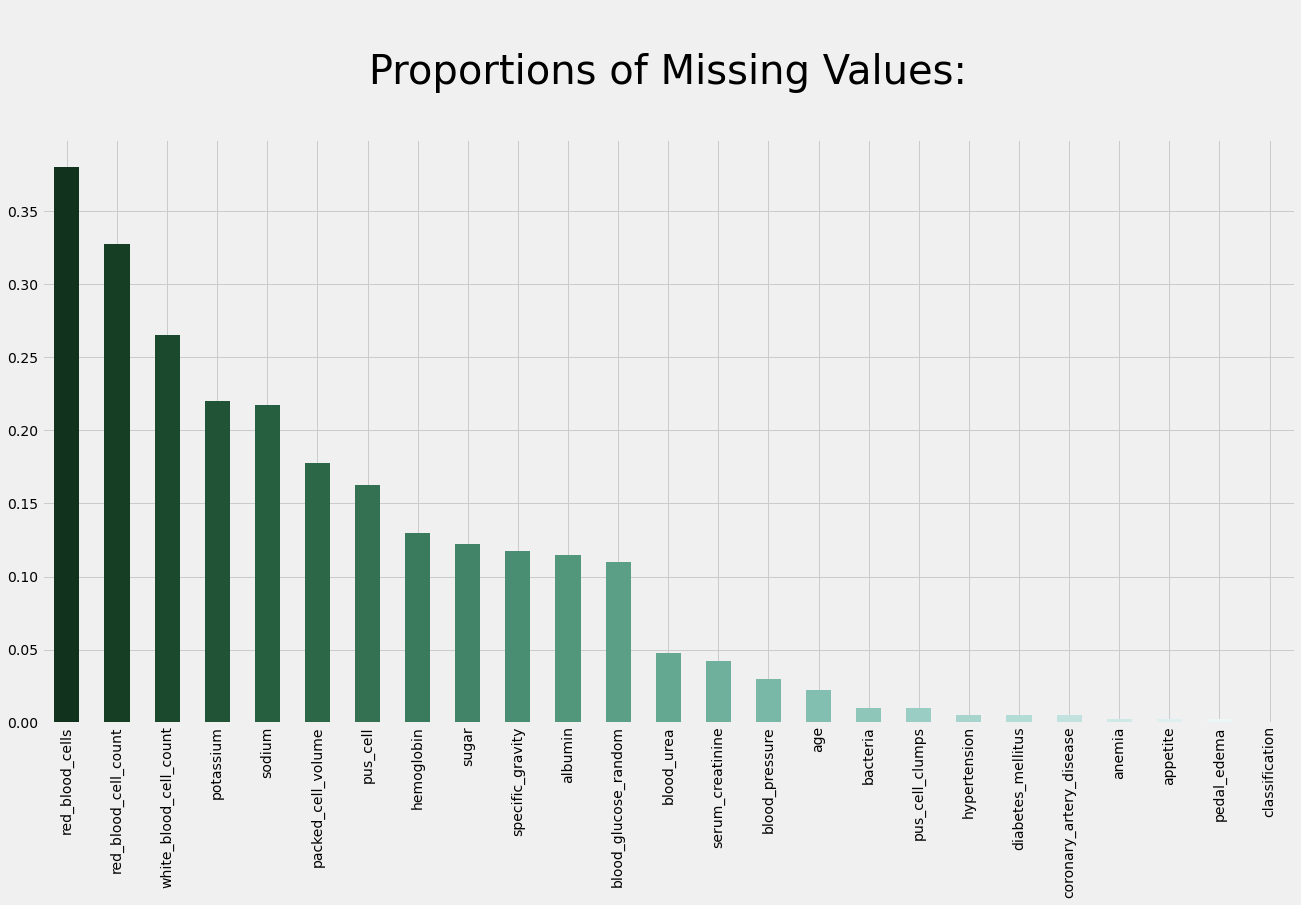

In [18]:
style.use('fivethirtyeight')

d=((ckd_df.isnull().sum()/ckd_df.shape[0])).sort_values(ascending=False)
d.plot(kind='bar',
       color=sns.cubehelix_palette(start=2,
                                    rot=0.15,
                                    dark=0.15,
                                    light=0.95,
                                    reverse=True,
                                    n_colors=24),
        figsize=(20,10))
plt.title("\nProportions of Missing Values:\n",fontsize=40)
plt.show()

In [19]:
ckd_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,48,7,62,48,51,60,68,24,52,53
blood_pressure,80,50,80,70,80,90,70,NaN,100,90
specific_gravity,1.02,1.02,1.01,1.005,1.01,1.015,1.01,1.015,1.015,1.02
albumin,1,4,2,4,2,3,0,2,3,2
sugar,0,0,3,0,0,0,0,4,0,0
red_blood_cells,NaN,NaN,normal,normal,normal,NaN,NaN,normal,normal,abnormal
pus_cell,normal,normal,normal,abnormal,normal,NaN,normal,abnormal,abnormal,abnormal
pus_cell_clumps,notpresent,notpresent,notpresent,present,notpresent,notpresent,notpresent,notpresent,present,present
bacteria,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent
blood_glucose_random,121,NaN,423,117,106,74,100,410,138,70


##### One-Hot Encoding

In [20]:
onehotdata=pd.get_dummies(ckd_df,drop_first=True,prefix_sep=': ')
onehotdata.head(13).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
age,48.00,7.00,62.00,48.000,51.00,60.000,68.00,24.000,52.000,53.00,50.00,63.00,68.000
blood_pressure,80.00,50.00,80.00,70.000,80.00,90.000,70.00,NaN,100.000,90.00,60.00,70.00,70.000
specific_gravity,1.02,1.02,1.01,1.005,1.01,1.015,1.01,1.015,1.015,1.02,1.01,1.01,1.015
albumin,1.00,4.00,2.00,4.000,2.00,3.000,0.00,2.000,3.000,2.00,2.00,3.00,3.000
sugar,0.00,0.00,3.00,0.000,0.00,0.000,0.00,4.000,0.000,0.00,4.00,0.00,1.000
blood_glucose_random,121.00,NaN,423.00,117.000,106.00,74.000,100.00,410.000,138.000,70.00,490.00,380.00,208.000
blood_urea,36.00,18.00,53.00,56.000,26.00,25.000,54.00,31.000,60.000,107.00,55.00,60.00,72.000
serum_creatinine,1.20,0.80,1.80,3.800,1.40,1.100,24.00,1.100,1.900,7.20,4.00,2.70,2.100
sodium,NaN,NaN,NaN,111.000,NaN,142.000,104.00,NaN,NaN,114.00,NaN,131.00,138.000
potassium,NaN,NaN,NaN,2.500,NaN,3.200,4.00,NaN,NaN,3.70,NaN,4.20,5.800


In [21]:
# define imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

impute_columns=list(set(onehotdata.columns)-set(["classification"]))
print(impute_columns)

['blood_glucose_random', 'hemoglobin', 'white_blood_cell_count', 'pus_cell_clumps: present', 'albumin', 'red_blood_cell_count', 'anemia: yes', 'pus_cell: normal', 'pedal_edema: yes', 'appetite: poor', 'bacteria: present', 'specific_gravity', 'red_blood_cells: normal', 'packed_cell_volume', 'age', 'sodium', 'coronary_artery_disease: yes', 'blood_pressure', 'diabetes_mellitus: yes', 'serum_creatinine', 'sugar', 'potassium', 'hypertension: yes', 'blood_urea']


In [22]:
imputer.fit(onehotdata[impute_columns])     

KNNImputer()

In [23]:
X_trans=pd.DataFrame(imputer.transform(onehotdata[impute_columns]), columns=impute_columns)

In [24]:
X_trans.head(13).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
blood_glucose_random,121.00,113.00,423.00,117.000,106.00,74.000,100.00,410.000,138.000,70.00,490.00,380.00,208.000
hemoglobin,15.40,11.30,9.60,11.200,11.60,12.200,12.40,12.400,10.800,9.50,9.40,10.80,9.700
white_blood_cell_count,7800.00,6000.00,7500.00,6700.000,7300.00,7800.000,10280.00,6900.000,9600.000,12100.00,9260.00,4500.00,12200.000
pus_cell_clumps: present,0.00,0.00,0.00,1.000,0.00,0.000,0.00,0.000,1.000,1.00,1.00,1.00,1.000
albumin,1.00,4.00,2.00,4.000,2.00,3.000,0.00,2.000,3.000,2.00,2.00,3.00,3.000
red_blood_cell_count,5.20,4.96,3.80,3.900,4.60,4.400,4.64,5.000,4.000,3.70,4.92,3.80,3.400
anemia: yes,0.00,0.00,1.00,1.000,0.00,0.000,0.00,0.000,1.000,1.00,1.00,0.00,0.000
pus_cell: normal,1.00,1.00,1.00,0.000,1.00,0.000,1.00,0.000,0.000,0.00,0.00,0.00,1.000
pedal_edema: yes,0.00,0.00,0.00,1.000,0.00,1.000,0.00,1.000,0.000,0.00,0.00,1.00,1.000
appetite: poor,0.00,0.00,1.00,1.000,0.00,0.000,0.00,0.000,0.000,1.00,0.00,1.00,1.000


In [25]:
X_trans # final datset

,blood_glucose_random,hemoglobin,white_blood_cell_count,pus_cell_clumps: present,albumin,red_blood_cell_count,anemia: yes,pus_cell: normal,pedal_edema: yes,appetite: poor,...,age,sodium,coronary_artery_disease: yes,blood_pressure,diabetes_mellitus: yes,serum_creatinine,sugar,potassium,hypertension: yes,blood_urea
0,121.0,15.4,7800.0,0.0,1.0,5.20,0.0,1.0,0.0,0.0,...,48.0,137.6,0.0,80.0,1.0,1.2,0.0,4.20,1.0,36.0
1,113.0,11.3,6000.0,0.0,4.0,4.96,0.0,1.0,0.0,0.0,...,7.0,136.8,0.0,50.0,0.0,0.8,0.0,3.92,0.0,18.0
2,423.0,9.6,7500.0,0.0,2.0,3.80,1.0,1.0,0.0,1.0,...,62.0,133.8,0.0,80.0,1.0,1.8,3.0,4.20,0.0,53.0
3,117.0,11.2,6700.0,1.0,4.0,3.90,1.0,0.0,1.0,1.0,...,48.0,111.0,0.0,70.0,0.0,3.8,0.0,2.50,1.0,56.0
4,106.0,11.6,7300.0,0.0,2.0,4.60,0.0,1.0,0.0,0.0,...,51.0,138.4,0.0,80.0,0.0,1.4,0.0,3.98,0.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,140.0,15.7,6700.0,0.0,0.0,4.90,0.0,1.0,0.0,0.0,...,55.0,150.0,0.0,80.0,0.0,0.5,0.0,4.90,0.0,49.0
396,75.0,16.5,7800.0,0.0,0.0,6.20,0.0,1.0,0.0,0.0,...,42.0,141.0,0.0,70.0,0.0,1.2,0.0,3.50,0.0,31.0
397,100.0,15.8,6600.0,0.0,0.0,5.40,0.0,1.0,0.0,0.0,...,12.0,137.0,0.0,80.0,0.0,0.6,0.0,4.40,0.0,26.0
398,114.0,14.2,7200.0,0.0,0.0,5.90,0.0,1.0,0.0,0.0,...,17.0,135.0,0.0,60.0,0.0,1.0,0.0,4.90,0.0,50.0


##### Modelling

In [26]:
X=X_trans
y=ckd_df["classification"]



X_prod=X_trans
print(X.shape)
print(y.shape)
print(X_prod.shape)

(400, 24)
(400,)
(400, 24)


###### Predictive Models with hyperparameter tuning Section

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV 

In [28]:
def display_confusion_matrix(y_test,y_pred):
    
    cm = confusion_matrix(y_test, y_pred_lr)
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")
    print(classification_report(y_test, y_pred))

In [29]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [30]:
##Split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 4658)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 24)
(80, 24)
(320,)
(80,)


##### Logistic Regression Hyper parameter tuning

Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.896875
Best estimator is LogisticRegression(C=0.006105402296585327) 


              precision    recall  f1-score   support

           0       0.84      0.84      0.84        25
           1       0.93      0.93      0.93        55

    accuracy                           0.90        80
   macro avg       0.88      0.88      0.88        80
weighted avg       0.90      0.90      0.90        80


Accuracy of Logistic Regression is : 0.9
Computation time 3.894 - Sec


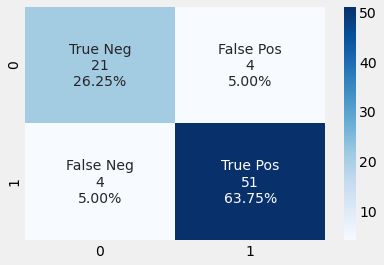

In [31]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

c_space = np.logspace(-5, 8, 15) 
param_grid = {'C': c_space} 

start_lr = time.time()
lr = GridSearchCV(LogisticRegression(), 
                  param_grid, 
                  cv = 5) 
lr.fit(X_train, y_train) 
end_lr = time.time()
final_lr = end_lr - start_lr
final_lr = round(final_lr,3)
final_lr

# Print the tuned parameters and score 
print("Tuned Logistic Regression Parameters: {}".format(lr.best_params_)) 
print("Best score is {}".format(lr.best_score_))
print("Best estimator is {} \n\n".format(lr.best_estimator_))

y_pred_lr = lr.predict(X_test)
display_confusion_matrix(y_test, y_pred_lr)
accuracy_lr=accuracy_score(y_test, y_pred_lr)
print("\nAccuracy of Logistic Regression is :", accuracy_lr)
print("Computation time {} - Sec".format(final_lr))

AUC: 0.88


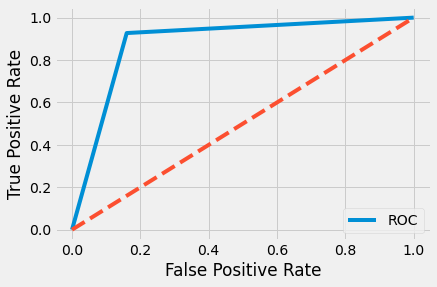

In [32]:
auc = roc_auc_score(y_test, y_pred_lr)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
plot_roc_curve(fpr, tpr)

##### Decision Tree Hyper parameter tuning

Tuned Decision Tree Parameters: {'min_samples_split': 2, 'max_leaf_nodes': 128, 'max_features': 0.2, 'max_depth': 10, 'criterion': 'gini', 'class_weight': {0: 1, 1: 3}}
Best score is 0.973536420904842
Best estimator is DecisionTreeClassifier(class_weight={0: 1, 1: 3}, max_depth=10,
                       max_features=0.2, max_leaf_nodes=128)
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        25
           1       0.96      0.98      0.97        55

    accuracy                           0.96        80
   macro avg       0.96      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80

Accuracy of Decision Tree is : 0.9625
Computation time 0.605 - Sec


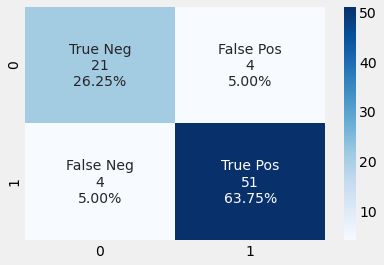

In [33]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV

hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

start_dt = time.time()
clf = RandomizedSearchCV(DecisionTreeClassifier(),
                         hyperparam_combs,
                         scoring='f1',
                         random_state=1,
                         n_iter=20)

dt_model = clf.fit(X_train, y_train)
end_dt = time.time()
final_dt = end_dt - start_dt
final_dt = round(final_dt,3)
final_dt

# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(dt_model.best_params_)) 
print("Best score is {}".format(dt_model.best_score_)) 
print("Best estimator is {}".format(dt_model.best_estimator_))

y_pred_dt = dt_model.predict(X_test)
display_confusion_matrix(y_test, y_pred_dt)
accuracy_dt=accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree is :", accuracy_dt)
print("Computation time {} - Sec".format(final_dt))

AUC: 0.95


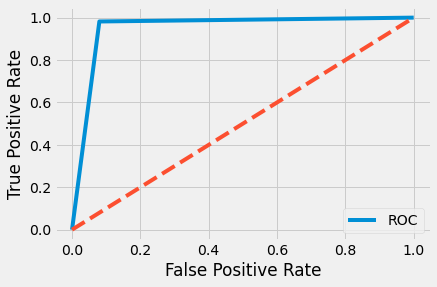

In [34]:
auc = roc_auc_score(y_test, y_pred_dt)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
plot_roc_curve(fpr, tpr)

##### Random Forest Hyper parameter tuning

Tuned Random Tree Parameters: {'n_estimators': 250, 'min_weight_fraction_leaf': 0.1, 'min_samples_split': 34, 'min_samples_leaf': 44, 'max_leaf_nodes': 56, 'max_depth': 8}
Best score is 0.9740908214592426
Best estimator is RandomForestClassifier(max_depth=8, max_leaf_nodes=56, min_samples_leaf=44,
                       min_samples_split=34, min_weight_fraction_leaf=0.1,
                       n_estimators=250)
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.98      0.99        55

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

Accuracy of Random Forests model is : 0.9875
Computation time 22.908 - Sec


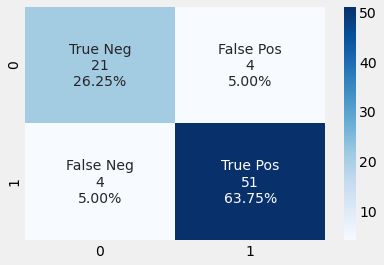

In [35]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {"n_estimators": np.arange(2, 300, 2),
              "max_depth": np.arange(1, 28, 1),
              "min_samples_split": np.arange(1,150,1),
              "min_samples_leaf": np.arange(1,60,1),
              "max_leaf_nodes": np.arange(2,60,1),
              "min_weight_fraction_leaf": np.arange(0.1,0.4, 0.1)}

start_rf = time.time()
rf = RandomizedSearchCV(RandomForestClassifier(),
                         param_grid,
                         scoring='f1',
                         random_state=4658,
                         n_iter=20)

rf_model = rf.fit(X_train, y_train)
end_rf = time.time()
final_rf = end_rf - start_rf
final_rf = round(final_rf,3)
final_rf

# Print the tuned parameters and score 
print("Tuned Random Tree Parameters: {}".format(rf_model.best_params_)) 
print("Best score is {}".format(rf_model.best_score_)) 
print("Best estimator is {}".format(rf_model.best_estimator_))

y_pred_rf = rf_model.predict(X_test)
display_confusion_matrix(y_test, y_pred_rf)
accuracy_rf=accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forests model is :", accuracy_rf)
print("Computation time {} - Sec".format(final_rf))

AUC: 0.99


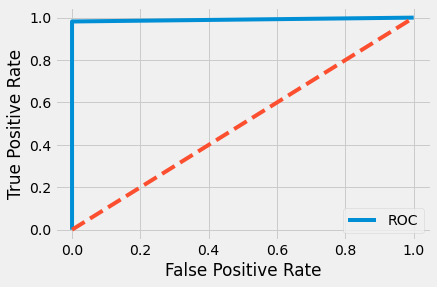

In [36]:
auc = roc_auc_score(y_test, y_pred_rf)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
plot_roc_curve(fpr, tpr)

##### Support Vector Machine Hyper parameter tuning

In [37]:
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 

start_svm = time.time()
svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
svm.fit(X_train, y_train)

end_svm = time.time()
final_svm = end_svm - start_svm
final_svm = round(final_svm,3)
final_svm

# Print the tuned parameters and score 
print("Tuned Support Vector Machine Parameters: {}".format(svm.best_params_)) 
print("Best score is {}".format(svm.best_score_))
print("Best estimator is {}".format(svm.best_estimator_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.609, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.609, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.609, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.609, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.609, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.609, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................. C=0.1, gamma=0.0001, score=0.609, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.609, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.609, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.609, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.609, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.609, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.609, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] .

[CV] .................. C=100, gamma=0.001, score=0.797, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .................. C=100, gamma=0.001, score=0.719, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .................. C=100, gamma=0.001, score=0.688, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .................. C=100, gamma=0.001, score=0.828, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] ................. C=100, gamma=0.0001, score=0.703, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] ................. C=100, gamma=0.0001, score=0.672, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] ................. C=100, gamma=0.0001, score=0.750, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.2s finished


              precision    recall  f1-score   support

           0       0.83      0.60      0.70        25
           1       0.84      0.95      0.89        55

    accuracy                           0.84        80
   macro avg       0.84      0.77      0.79        80
weighted avg       0.84      0.84      0.83        80

Accuracy of Support Vector Machine is : 0.8375
Computation time 1.166 - Sec


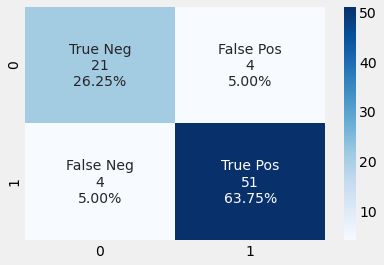

In [38]:
y_pred_svm = svm.predict(X_test)
display_confusion_matrix(y_test, y_pred_svm)
accuracy_svm=accuracy_score(y_test, y_pred_svm)
print("Accuracy of Support Vector Machine is :", accuracy_svm)
print("Computation time {} - Sec".format(final_svm))

AUC: 0.77


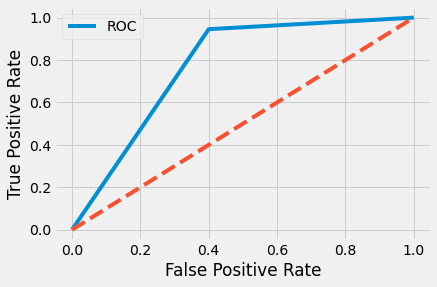

In [39]:
auc = roc_auc_score(y_test, y_pred_svm)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
plot_roc_curve(fpr, tpr)

##### Artificial neural network

In [40]:
from sklearn.neural_network import MLPClassifier

# defining parameter range
param_grid = { 
              'max_iter': [1000]
} 

start_mlp = time.time()
mlp = GridSearchCV(MLPClassifier(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
mlp.fit(X_train, y_train.values.ravel())

end_mlp = time.time()
final_mlp = end_mlp - start_mlp
final_mlp = round(final_mlp,3)
final_mlp

# Print the tuned parameters and score 
print("Tuned Artificial neural network Parameters: {}".format(mlp.best_params_)) 
print("Best score is {}".format(mlp.best_score_))
print("Best estimator is {}".format(mlp.best_estimator_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_iter=1000 ...................................................
[CV] ....................... max_iter=1000, score=0.750, total=   0.1s
[CV] max_iter=1000 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ....................... max_iter=1000, score=0.859, total=   0.2s
[CV] max_iter=1000 ...................................................
[CV] ....................... max_iter=1000, score=0.641, total=   0.2s
[CV] max_iter=1000 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ....................... max_iter=1000, score=0.703, total=   0.1s
[CV] max_iter=1000 ...................................................
[CV] ....................... max_iter=1000, score=0.672, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished


Tuned Artificial neural network Parameters: {'max_iter': 1000}
Best score is 0.725
Best estimator is MLPClassifier(max_iter=1000)


              precision    recall  f1-score   support

           0       0.94      0.68      0.79        25
           1       0.87      0.98      0.92        55

    accuracy                           0.89        80
   macro avg       0.91      0.83      0.86        80
weighted avg       0.89      0.89      0.88        80

Accuracy of Artificial neural network  is : 0.8875
Computation time 0.926 - Sec


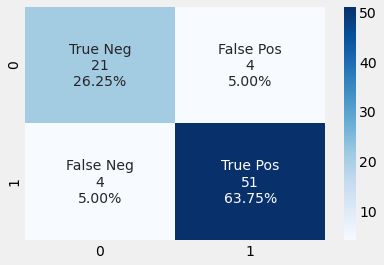

In [41]:
y_pred_mlp = mlp.predict(X_test)
display_confusion_matrix(y_test, y_pred_mlp)
accuracy_mlp=accuracy_score(y_test, y_pred_mlp)
print("Accuracy of Artificial neural network  is :", accuracy_mlp)
print("Computation time {} - Sec".format(final_mlp))

AUC: 0.83


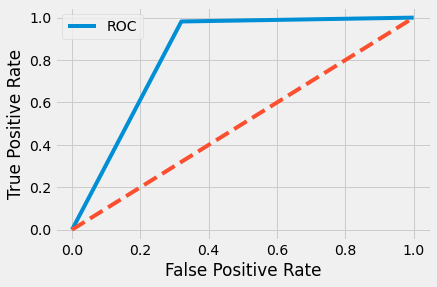

In [42]:
auc = roc_auc_score(y_test, y_pred_mlp)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_mlp)
plot_roc_curve(fpr, tpr)

In [43]:
accuracies1 = [lr.best_score_,dt_model.best_score_,rf_model.best_score_, svm.best_score_, mlp.best_score_]
final_time1 = [final_lr,final_dt,final_rf, final_svm, final_mlp]
print(accuracies1)
print(final_time1)

models= ['LogisticRegression', 'DecisionTrees', 'RandomForests', 'Support Vector Machine', 'Artificial neural network']

[0.896875, 0.973536420904842, 0.9740908214592426, 0.75625, 0.725]
[3.894, 0.605, 22.908, 1.166, 0.926]


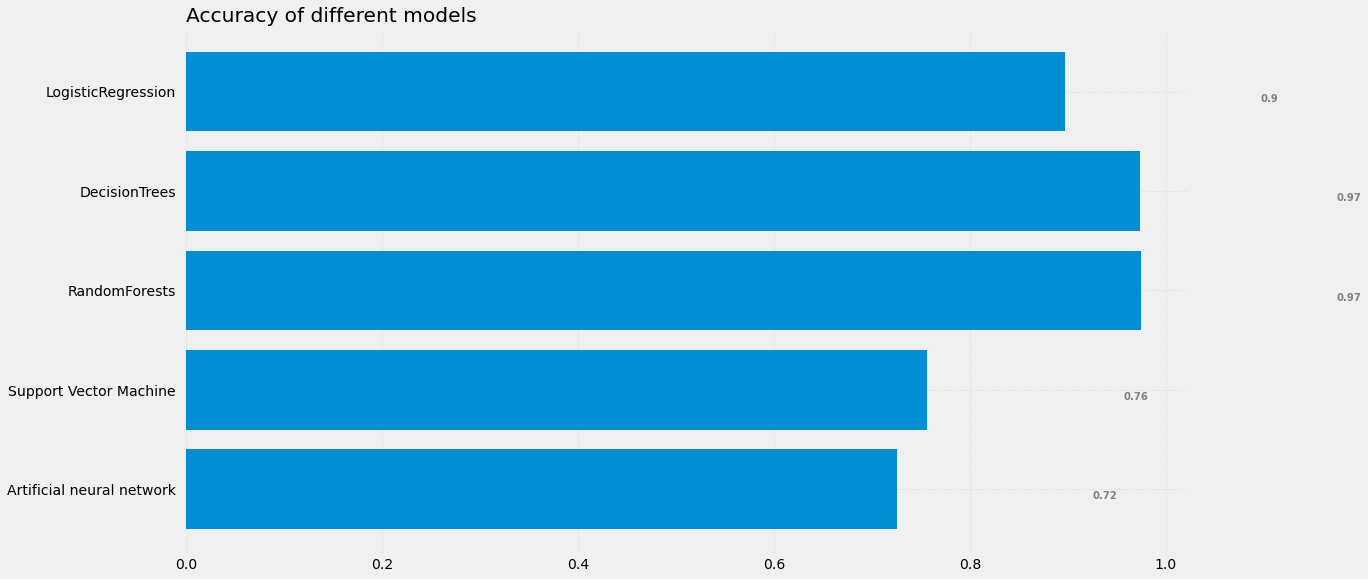

In [44]:
# Figure Size 
fig, ax = plt.subplots(figsize =(16, 9)) 
# Horizontal Bar Plot 
ax.barh(models, accuracies1) 

# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 

# Show top values 
ax.invert_yaxis() 

# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
            str(round((i.get_width()), 2)), 
            fontsize = 10, fontweight ='bold', 
            color ='grey') 
ax.set_title('Accuracy of different models', loc ='left') 
plt.show() 

###### StandardScaler data with PCA implementation

In [45]:
# performing preprocessing part 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 

X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [46]:
# Applying PCA function on training and testing set of X component 
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2) 

X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 

explained_variance = pca.explained_variance_ratio_ 
explained_variance

array([0.30943656, 0.07796664])

##### Logistic Regression Hyper parameter tuning

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best score is 0.978125
Best estimator is LogisticRegression(C=3.727593720314938) 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        55

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


Accuracy of Logistic Regression is : 0.978125
Computation time 0.509 - Sec


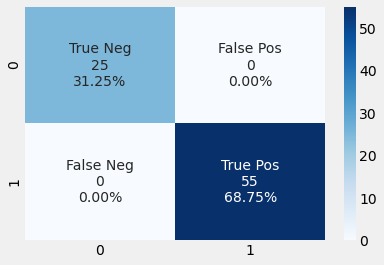

In [47]:
c_space = np.logspace(-5, 8, 15) 
param_grid = {'C': c_space} 

start_lr = time.time()
lr = GridSearchCV(LogisticRegression(), 
                  param_grid, 
                  cv = 5) 
lr.fit(X_train, y_train) 
end_lr = time.time()
final_lr = end_lr - start_lr
final_lr = round(final_lr,3)
final_lr

# Print the tuned parameters and score 
print("Tuned Logistic Regression Parameters: {}".format(lr.best_params_)) 
print("Best score is {}".format(lr.best_score_))
print("Best estimator is {} \n\n".format(lr.best_estimator_))

y_pred_lr = lr.predict(X_test)
display_confusion_matrix(y_test, y_pred_lr)
accuracy_lr=lr.best_score_
print("\nAccuracy of Logistic Regression is :", accuracy_lr)
print("Computation time {} - Sec".format(final_lr))

AUC: 1.00


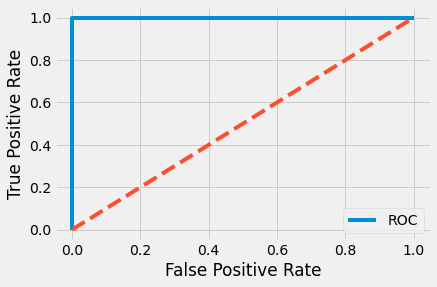

In [48]:
auc = roc_auc_score(y_test, y_pred_lr)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
plot_roc_curve(fpr, tpr)

##### Decision Tree Hyper parameter tuning

Tuned Decision Tree Parameters: {'min_samples_split': 20, 'max_leaf_nodes': 64, 'max_features': 0.6, 'max_depth': 6, 'criterion': 'gini', 'class_weight': {0: 1, 1: 5}}
Best score is 0.9872768581629341
Best estimator is DecisionTreeClassifier(class_weight={0: 1, 1: 5}, max_depth=6, max_features=0.6,
                       max_leaf_nodes=64, min_samples_split=20)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        55

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Accuracy of Decision Tree is : 0.9872768581629341
Computation time 0.273 - Sec


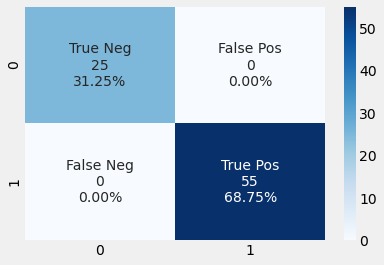

In [49]:
hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

start_dt = time.time()
clf = RandomizedSearchCV(DecisionTreeClassifier(),
                         hyperparam_combs,
                         scoring='f1',
                         random_state=1,
                         n_iter=20)

dt_model = clf.fit(X_train, y_train)
end_dt = time.time()
final_dt = end_dt - start_dt
final_dt = round(final_dt,3)
final_dt

# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(dt_model.best_params_)) 
print("Best score is {}".format(dt_model.best_score_)) 
print("Best estimator is {}".format(dt_model.best_estimator_))

y_pred_dt = dt_model.predict(X_test)
display_confusion_matrix(y_test, y_pred_dt)
accuracy_dt=dt_model.best_score_
print("Accuracy of Decision Tree is :", accuracy_dt)
print("Computation time {} - Sec".format(final_dt))

AUC: 1.00


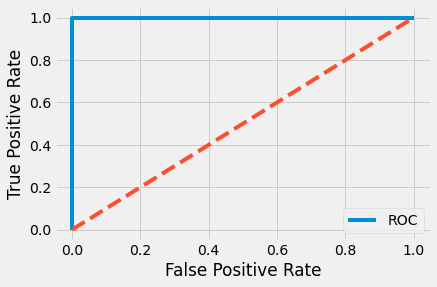

In [50]:
auc = roc_auc_score(y_test, y_pred_dt)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
plot_roc_curve(fpr, tpr)

##### Random Forest Hyper parameter tuning

Tuned Random Tree Parameters: {'n_estimators': 292, 'min_weight_fraction_leaf': 0.30000000000000004, 'min_samples_split': 6, 'min_samples_leaf': 33, 'max_leaf_nodes': 11, 'max_depth': 11}
Best score is 0.9872768581629341
Best estimator is RandomForestClassifier(max_depth=11, max_leaf_nodes=11, min_samples_leaf=33,
                       min_samples_split=6,
                       min_weight_fraction_leaf=0.30000000000000004,
                       n_estimators=292)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        55

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Accuracy of Random Forests model is : 0.9872768581629341
Computation time 22.332 - Sec


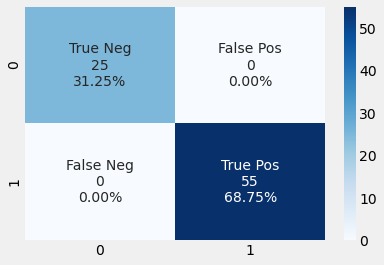

In [51]:
param_grid = {"n_estimators": np.arange(2, 300, 2),
              "max_depth": np.arange(1, 28, 1),
              "min_samples_split": np.arange(1,150,1),
              "min_samples_leaf": np.arange(1,60,1),
              "max_leaf_nodes": np.arange(2,60,1),
              "min_weight_fraction_leaf": np.arange(0.1,0.4, 0.1)}

start_rf = time.time()
rf = RandomizedSearchCV(RandomForestClassifier(),
                         param_grid,
                         scoring='f1',
                         random_state=4658,
                         n_iter=20)

rf_model = rf.fit(X_train, y_train)
end_rf = time.time()
final_rf = end_rf - start_rf
final_rf = round(final_rf,3)
final_rf

# Print the tuned parameters and score 
print("Tuned Random Tree Parameters: {}".format(rf_model.best_params_)) 
print("Best score is {}".format(rf_model.best_score_)) 
print("Best estimator is {}".format(rf_model.best_estimator_))

y_pred_rf = rf_model.predict(X_test)
display_confusion_matrix(y_test, y_pred_rf)
accuracy_rf=rf_model.best_score_
print("Accuracy of Random Forests model is :", accuracy_rf)
print("Computation time {} - Sec".format(final_rf))

AUC: 1.00


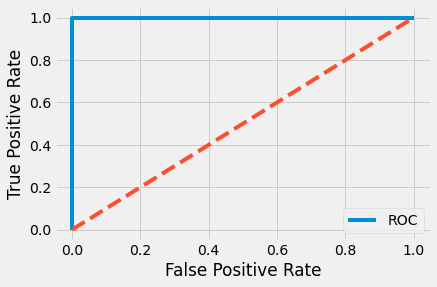

In [52]:
auc = roc_auc_score(y_test, y_pred_rf)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
plot_roc_curve(fpr, tpr)

##### Support Vector Machine Hyper parameter tuning

In [53]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 

start_svm = time.time()
svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
svm.fit(X_train, y_train)

end_svm = time.time()
final_svm = end_svm - start_svm
final_svm = round(final_svm,3)
final_svm

# Print the tuned parameters and score 
print("Tuned Support Vector Machine Parameters: {}".format(svm.best_params_)) 
print("Best score is {}".format(svm.best_score_))
print("Best estimator is {}".format(svm.best_estimator_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.984, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.984, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.984, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.969, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.953, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=10, gamma=0.1, score=1.000, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.969, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.969, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.984, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.969, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=1.000, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.953, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.4s finished


              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.95      0.97        55

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80

Accuracy of Support Vector Machine is : 0.9875
Computation time 0.384 - Sec


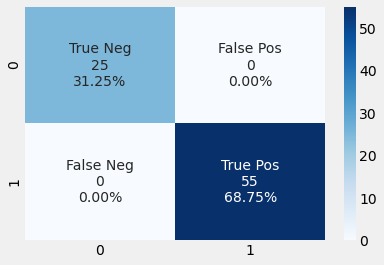

In [54]:
y_pred_svm = svm.predict(X_test)
display_confusion_matrix(y_test, y_pred_svm)
accuracy_svm=svm.best_score_
print("Accuracy of Support Vector Machine is :", accuracy_svm)
print("Computation time {} - Sec".format(final_svm))

AUC: 0.97


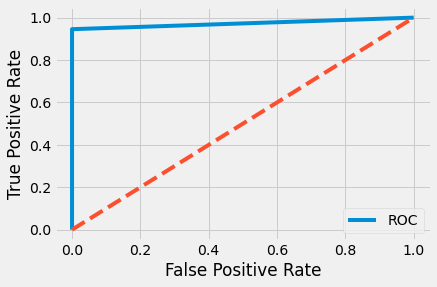

In [55]:
auc = roc_auc_score(y_test, y_pred_svm)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
plot_roc_curve(fpr, tpr)

##### Artificial neural network

In [57]:
# defining parameter range
param_grid = { 
              'max_iter': [1000],
            } 

start_mlp = time.time()
mlp = GridSearchCV(MLPClassifier(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
mlp.fit(X_train, y_train.values.ravel())

end_mlp = time.time()
final_mlp = end_mlp - start_mlp
final_mlp = round(final_mlp,3)
final_mlp

# Print the tuned parameters and score 
print("Tuned Artificial neural network Parameters: {}".format(mlp.best_params_)) 
print("Best score is {}".format(mlp.best_score_))
print("Best estimator is {}".format(mlp.best_estimator_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_iter=1000 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... max_iter=1000, score=0.969, total=   0.6s
[CV] max_iter=1000 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ....................... max_iter=1000, score=0.984, total=   0.7s
[CV] max_iter=1000 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV] ....................... max_iter=1000, score=0.984, total=   0.6s
[CV] max_iter=1000 ...................................................
[CV] ....................... max_iter=1000, score=0.969, total=   0.6s
[CV] max_iter=1000 ...................................................
[CV] ....................... max_iter=1000, score=1.000, total=   0.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.2s finished


Tuned Artificial neural network Parameters: {'max_iter': 1000}
Best score is 0.98125
Best estimator is MLPClassifier(max_iter=1000)


              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.98      0.99        55

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

Accuracy of Artificial neural network  is : 0.98125
Computation time 3.76 - Sec


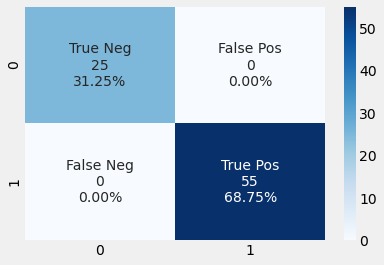

In [58]:
y_pred_mlp = mlp.predict(X_test)
display_confusion_matrix(y_test, y_pred_mlp)
accuracy_mlp=mlp.best_score_
print("Accuracy of Artificial neural network  is :", accuracy_mlp)
print("Computation time {} - Sec".format(final_mlp))

AUC: 0.99


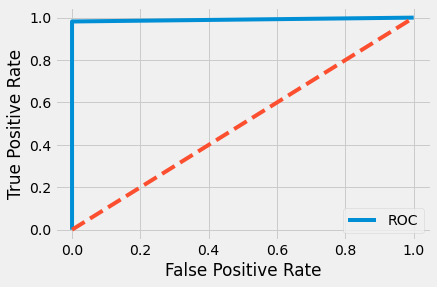

In [59]:
auc = roc_auc_score(y_test, y_pred_mlp)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_mlp)
plot_roc_curve(fpr, tpr)

In [62]:
accuracies2 = [lr.best_score_,dt_model.best_score_,rf_model.best_score_, svm.best_score_, mlp.best_score_]
final_time2 = [final_lr,
               final_dt,
               final_rf, 
               final_svm, 
               final_mlp]
print(accuracies2)
print(final_time2)

[0.978125, 0.9872768581629341, 0.9872768581629341, 0.9875, 0.98125]
[0.509, 0.273, 22.332, 0.384, 3.76]


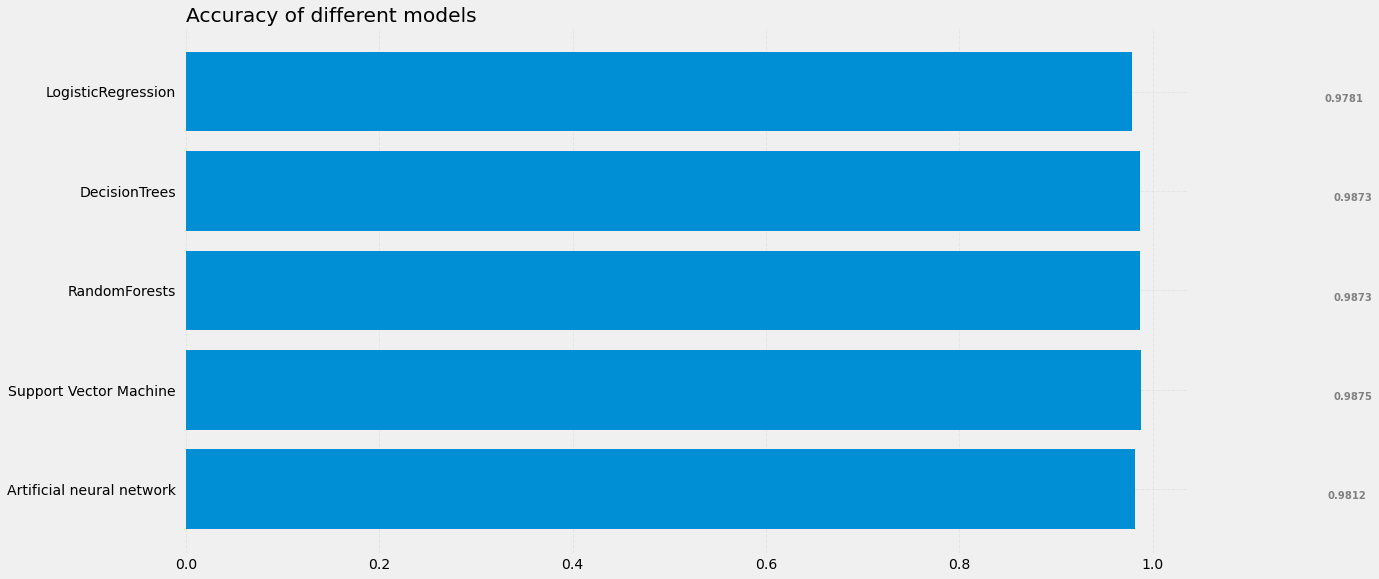

In [63]:
# Figure Size 
fig, ax = plt.subplots(figsize =(16, 9)) 
# Horizontal Bar Plot 
ax.barh(models, accuracies2) 

# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 

# Show top values 
ax.invert_yaxis() 

# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
            str(round((i.get_width()), 4)), 
            fontsize = 10, fontweight ='bold', 
            color ='grey') 
ax.set_title('Accuracy of different models', loc ='left') 
plt.show() 